In [75]:
import pandas as pd
from matplotlib import pyplot as plt
from geopy.geocoders import Nominatim
import folium
from folium import plugins

In [53]:
##This is the data from https://www.bostonplans.org/housing/finding-housing/property-listings
##apparently it was an embedded google doc, so I just messed with the url.
affordable_db = pd.read_csv('Buildings_Featuring_Existing_Affordable_Rental_Units_Existing_Affordable_Rental_Units.csv')

#renaming columns
aff_ugly_col_names = affordable_db.columns.tolist()
new_names = ['Neighborhood','Building Address','Contact Info','Tracked Units','Bedroom Sizes','AMI Categories']
affordable_db = affordable_db.rename(columns =dict(zip(aff_ugly_col_names,new_names)))

#what is AMI Categories?
#Building addresses don't have area codes.  Not sure that ruins anything, but if we do have to join on address
#it isn't ideal
affordable_db = affordable_db.drop(labels=0, axis=0)
display(affordable_db.head(10))

trackedUnits = pd.DataFrame().assign(Units=affordable_db['Tracked Units'])
trackedUnits=trackedUnits.dropna()
#we dropped about 2 rows
trackedUnits["Units"] = trackedUnits.apply(lambda row: int(row),axis = 1)
totalUnits = trackedUnits.sum()

print("Total Units = " + str(totalUnits))


,Neighborhood,Building Address,Contact Info,Tracked Units,Bedroom Sizes,AMI Categories
1,Allston,31 North Beacon Street,Carol Fiore: cfiore@78clean.com,3.0,"Studio, 1BR, 2BR",70%
2,Allston,40 Malvern Street,40Malvern@maloneyproperties.com,6.0,"1BR, 2BR",70%
3,Allston,450 Cambridge Street,Maloney Properties: 617.209.5406\r\n450Cambrid...,5.0,"1BR, 2BR",70%
4,Allston,1505 Commonwealth Avenue,LBC Boston: 617.599.7261,10.0,"Studio, 1BR, 2BR",70%
5,Allston,Continuum\r\n219 Western Avenue,Continuum@maloneyproperties.com,42.0,"Studio, 1BR, 2BR, 3BR",70%
6,Allston,The Eco Allston\r\n75 Brainerd Road,National Development: 857.576.6160,14.0,"Studio, 1BR, 2BR",70%
7,Allston,The Edge\r\n60–66 Brainerd Road,National Development: 857.576.6160,10.0,"Studio, 1BR, 2BR",70%
8,Allston,The Element\r\n65 Brainerd Road,National Development: 857.576.6160,4.0,"Studio, 1BR",70%
9,Allston,The Gateway\r\n1298 & 1302 Commonwealth Ave,Mount Vernon: 617.267.0006,8.0,"Studio, 1BR",70%
10,Allston,The Radius Apartments\r\n530 Western Avenue,Radius@maloneyproperties.com,17.0,"micro, studio, 1BD, 2BD",70%


Total Units = Units    1974
dtype: int64


In [50]:
affordable_db.head()

,Neighborhood,Building Address,Contact Info,Tracked Units,Bedroom Sizes,AMI Categories
1,Allston,31 North Beacon Street,Carol Fiore: cfiore@78clean.com,3.0,"Studio, 1BR, 2BR",70%
2,Allston,40 Malvern Street,40Malvern@maloneyproperties.com,6.0,"1BR, 2BR",70%
3,Allston,450 Cambridge Street,Maloney Properties: 617.209.5406\r\n450Cambrid...,5.0,"1BR, 2BR",70%
4,Allston,1505 Commonwealth Avenue,LBC Boston: 617.599.7261,10.0,"Studio, 1BR, 2BR",70%
5,Allston,Continuum\r\n219 Western Avenue,Continuum@maloneyproperties.com,42.0,"Studio, 1BR, 2BR, 3BR",70%


In [70]:
dfGrouped = affordable_db.groupby(['Neighborhood'])
dfGroupedKeys = dfGrouped.groups.keys()
d = {'neighborhood':[],'totalUnits':[],'buildings':[]}
for i in dfGroupedKeys:
    groupDf = dfGrouped.get_group(i)
    buildings = len(groupDf)
    print("Neighborhood "+ i + " has " + str(buildings) + " EXISTING affordable Buildings")
    trackedUnits = pd.DataFrame().assign(Units=groupDf['Tracked Units'])
    trackedUnits=trackedUnits.dropna()
    trackedUnits["Units"] = trackedUnits.apply(lambda row: int(row),axis = 1)
    totalUnits = int(trackedUnits.sum())
    d['neighborhood'].append(i)
    d['totalUnits'].append(totalUnits)
    d['buildings'].append(buildings)
    print("Total Units in neighborhood " + i + ' is: ' + str(totalUnits))

muniDf = pd.DataFrame(d, columns = ['neighborhood', 'totalUnits','buildings'])

Neighborhood Allston has 11 EXISTING affordable Buildings
Total Units in neighborhood Allston is: 130
Neighborhood Back Bay has 4 EXISTING affordable Buildings
Total Units in neighborhood Back Bay is: 90
Neighborhood Brighton has 5 EXISTING affordable Buildings
Total Units in neighborhood Brighton is: 106
Neighborhood Charlestown has 6 EXISTING affordable Buildings
Total Units in neighborhood Charlestown is: 102
Neighborhood Dorchester has 8 EXISTING affordable Buildings
Total Units in neighborhood Dorchester is: 81
Neighborhood Downtown has 9 EXISTING affordable Buildings
Total Units in neighborhood Downtown is: 192
Neighborhood East Boston has 5 EXISTING affordable Buildings
Total Units in neighborhood East Boston is: 103
Neighborhood Fenway has 14 EXISTING affordable Buildings
Total Units in neighborhood Fenway is: 284
Neighborhood Fort Point has 4 EXISTING affordable Buildings
Total Units in neighborhood Fort Point is: 67
Neighborhood Hyde Park has 2 EXISTING affordable Buildings
T

In [73]:
#we will fille muniDf with lat and long and zip
hoods = list(muniDf['neighborhood'])
bosHoodLat = {}
bosHoodLong = {}
geolocator = Nominatim(user_agent="geoapiExercises")
for i in hoods:
    place = i + ", Boston"
    location = geolocator.geocode(place)
    bosHoodLat[i] = location.raw['lat']
    bosHoodLong[i] = location.raw['lon']


muniDf['latitude'] = muniDf.apply(lambda row: bosHoodLat[row[0]],axis=1)
muniDf['longitude'] = muniDf.apply(lambda row: bosHoodLong[row[0]],axis=1)
muniDf.head()

#TODO YAY now we just need to add zip codes, we can do this later tho

,neighborhood,totalUnits,buildings,latitude,longitude
0,Allston,130,11,42.3555375,-71.1327494
1,Back Bay,90,4,42.35054885,-71.08031131584724
2,Brighton,106,5,42.3491615,-71.1533859
3,Charlestown,102,6,42.3778749,-71.0619957
4,Dorchester,81,8,42.2973205,-71.0744952


In [80]:
bare = muniDf[["latitude","longitude","totalUnits"]]
map = folium.Map(location = [42.35, -71.06],zoom_start=13)
hm = plugins.HeatMap(bare)
hm.add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
folium.LayerControl().add_to(map)
display(map)
map.save("affordableHousingBoston.html")

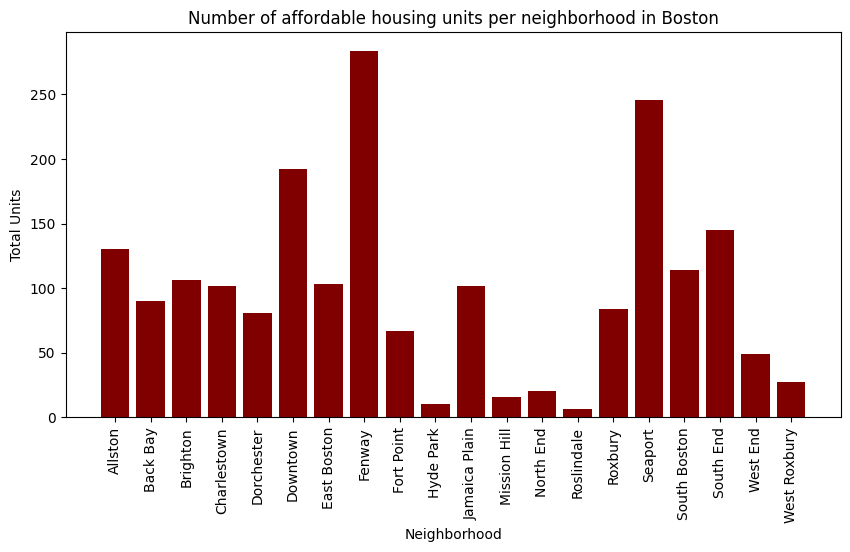

In [69]:
muniDf

#displays each neighborhood and how many existing affordable housing units exist there. 



types = list(d['neighborhood'])
values = list(d['totalUnits'])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, values, color ='maroon')
 
plt.xlabel("Neighborhood")
plt.ylabel("Total Units")
plt.title("Number of affordable housing units per neighborhood in Boston")
plt.xticks(rotation=90)
plt.show()

Helpful Resources:
https://data.boston.gov/dataset/property-assessment
This holds all the information about the dataset including the data dictionary

In [3]:
bostonUnits = pd.read_csv('Property_Assessment_FY2022.csv')
#this file holds all properties in Boston
len(bostonUnits)

178598

In [4]:
bostonUnits.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,3,A - Average,NaN
1,100002000,,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN
2,100003000,,100003000.0,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0,NaN,0,A - Average,NaN
3,100004000,,100004000.0,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
4,100005000,,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN


In [6]:
bostonUnits.columns
#column dictionary can be found at https://data.boston.gov/dataset/property-assessment/resource/db9d1e04-080b-4477-96e0-c440f3ff29f1


Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY',
       'ZIPCODE', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE',
       'OWN_OCC', 'OWNER', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_CITY',
       'MAIL_STATE', 'MAIL_ZIPCODE', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS',
       'COM_UNITS', 'RC_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA',
       'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT',
       'YR_REMODEL', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER',
       'INT_WALL', 'EXT_FINISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND',
       'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'KITCHEN', 'TT_RMS', 'BDRM_COND',
       'BTHRM_STYLE1', 'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE',
       'KITCHEN_STYLE1', 'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE',
       'HEAT_FUEL', 'AC_TYPE', 'FIRE_PLACE', 'ORIENTATION', 'NUM_PARKING',
       'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')

In [7]:
owner_occupied = bostonUnits[bostonUnits['OWN_OCC'] == 'Y']
len(owner_occupied)

78242

In [8]:
owner_occupied.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,3,A - Average,NaN
1,100002000,,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN
4,100005000,,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
7,100008000,,100008000.0,213,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
10,100011000,,100011000.0,219,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,...,M - Modern,NaN,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN


In [12]:
print("Percentage of boston housing parcels which are owner occupied: "+ str(len(owner_occupied)/len(bostonUnits)))
print("Note each parcel may have multiple units")

Percentage of boston housing parcels which are owner occupied: 0.4380900122061837
Note each parcel may have multiple units


In [43]:
#Creating a new dataframe with the data of interest
ownerData = owner_occupied[['PID', 'CM_ID', 'GIS_ID','RES_FLOOR', 'LU','RES_UNITS','UNIT_NUM']]
print(len(ownerData))
ownerData.head()
#note in owner data all of the condo mains are removed since owneroccupied Y is N for all  mains
#

78242


,PID,CM_ID,GIS_ID,RES_FLOOR,LU,RES_UNITS,UNIT_NUM
0,100001000,,100001000.0,3.0,R3,0,NaN
1,100002000,,100002000.0,3.0,R3,0,NaN
4,100005000,,100005000.0,3.0,R2,0,NaN
7,100008000,,100008000.0,3.0,R3,0,NaN
10,100011000,,100011000.0,3.0,R2,0,NaN


In [40]:
temp = ownerData[ownerData['LU'] == 'R4']
temp.head()

,PID,CM_ID,GIS_ID,RES_FLOOR,LU,RES_UNITS,UNIT_NUM
292,100244000,,100244000.0,3.0,R4,0,NaN
588,100531000,,100531000.0,3.0,R4,0,NaN
990,100856000,,100856000.0,2.5,R4,0,NaN
1759,101528000,,101528000.0,4.0,R4,0,NaN
2019,101728000,,101728000.0,3.0,R4,0,NaN


Notice in the above dataframe head how there are float values for Res_floor and res_units has 0 and unit_num has NaN values. Thus none of those columns are useful since there is garbage data in place. Instead our best way of estimating units per property that is owner occupied is using LU and simply using the number preceding the R as our value. Note for properties of up to 3 units this is not a problem however for units of more than size 4 we will see issues since they could have more. Additionally if some properties have LU as A which signifies that there are more than 7 residential units. We also have issues with condominium units in the data since have a NaN won't allow us to see how many units are in that condominium

Condominimun Units data organization: All condo units contain a 'main entry' and then sub rows for each unit. If you do a group by on GIS_ID then each condominium can be separated from one another. Remember if a sum on this GROUPBy is computed then you will have to subtract 1 from each sum since the main entry isn't a condo unit, it simply is a connector for all. I recommend separating condos from housing units and processing them separately. Additionally to find condo main simply check that PID = CM_ID = GIS_ID, then you can pull RES_UNITS from there to get the residential units of the condo. 

Important Question is Datasets: Are all affordable housing units just income restricted units

In [44]:
#owner_occupied.groupby(['CITY'])['UNIT_NUM'].count().reset_index().sort_values(by=['UNIT_NUM'],ascending = False)
#a useful table for seeing what parts of the city have units
# instead of running this query we should instead group by neighborhood/city then group by LU and get the counts 


In [45]:
#owner_occupied.groupby(['LU_DESC'])['UNIT_NUM'].count().reset_index().sort_values(by=['UNIT_NUM'],ascending = False)
##weird that we getting zeros.  but hey.

owner_occupied.groupby(['LU'])['LU'].count()


LU
A        55
CD    35915
R1    25640
R2    10479
R3     5488
R4      419
RC      245
RL        1
Name: LU, dtype: int64

This rrepresents the various building types and the distribution of them amongst the full owner occupied properties. 